# Superconductivity Regression

   The aim of this project is to predict the critical temperature of a superconductor, based on the features extracted from the material's chemical formula, using a statistical regression model. The features used in the model are derived from the supercodnductor's thermal conductivity, atomic radius, valence, electron affinity, and atomic mass. The data used for this analysis can be found [here](http://archive.ics.uci.edu/ml/datasets/Superconductivty+Data).
   
   Superconductors are special kinds of metallic elements and compounds which, once cooled down to a certain temperature, referred to as its *critical temperature*, measured in degrees Kelvin (K), will conduct electricity without any resistance whatsoever. For as long as electricity has existed, resistance has been an inherit phenomenon in eletronics and electrical circuits. As electricity flows through any material, say a wire, it is met by resistance from the atoms of the material itself causing it to lose energy along the way. Resistance has long been seen as an unavoidable phenomenon until the discovery of superconductors. It was discovered that when certain metals are cooled to extremley low temperatures, electricity is able to flow through the material unhindered with exactly zero resistance. The practical applications of superconducters in the real world include an increase in electrical signal speeds, increases in cellular bandwidth, frinctionless forms of transportation, and the transmission of electricity that is orders of magnitude more efficient than it is today. 
   
   One of the biggest challenges to making superconducting materials a reality is the lack of a standardized scientific model and theory that predicts the critical temperature of a metal.  Knowledge of the critical temperature of a material guides researchers towards ways of achieving the low temperatures necessary for the material to exhibit superconducting properties. Many critical temperatures are extremley low requiring vast amounts of energy to achieve. Precise predictions of critical temperatures would allow us to quickly exclude certain materials from being considered for practical applications while also notifying us exactly how much energy we would need to extract superconductive properties from others. The data in this project has been collected and utilized by researcher Kam Hamidieh of the statistics department at the University of Pennsylvania for his paper entitled [*A data-driven statistical model for predicting the critical temperature of a superconductor*](https://www.sciencedirect.com/science/article/pii/S0927025618304877?via%3Dihub#!)


Click on the links below to jump to a particular step in the project: 

  * [Data Processing & Exploration](#Data-Processing-&-Exploration)
  
  * [Model Selection](#Model-Selection)
  
  * [Predictive Model](#Predictive-Model)
    
   * [Building the Model](#Building-the-Model)
    
   * [Assessing the Model](#Assessing-the-Model)
   
  * [Conclusion](#Conclusion)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
import pydot
from math import sqrt
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.tree import export_graphviz
from rfr_prediction_int import mspe_one
from IPython.core.interactiveshell import InteractiveShell
import warnings

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_context("poster")
sns.set(style="darkgrid")

warnings.filterwarnings("ignore")

InteractiveShell.ast_node_interactivity = "all"

In [3]:
feature_data = pd.read_csv('data/train.csv')
sc_chem_formula = pd.read_csv('data/unique_m.csv')

## Data Processing & Exploration

In [4]:
# Let's take a quick look at our data.

feature_data.head()
sc_chem_formula.head()
feature_data.shape
sc_chem_formula.shape

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


(21263, 82)

(21263, 88)

In [5]:
# Let's combine the dataframes together and get a holistic view of the data. I figure that I will be including data from
# both dataframes as features into the model; at least initially.

all_data = pd.concat([feature_data.drop('critical_temp',axis=1), sc_chem_formula.iloc[:,:87]], axis=1)
all_data.head()
all_data.shape

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

(21263, 168)

In [10]:
# Lets take a look at some basic info.

all_data.info()
all_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 168 entries, number_of_elements to critical_temp
dtypes: float64(156), int64(12)
memory usage: 27.3 MB


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.11522

Looks like all of our features are either floats or integers. Also, our dependent variable, critical_temp, possesses a wide range between 0.000210 K and 185.00 K. 

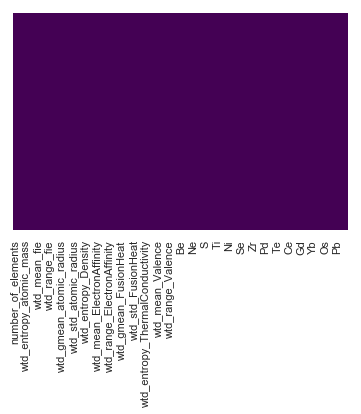

In [12]:
# Checking for missing values.

sns.heatmap(all_data.isnull(), yticklabels=False, cbar=False, cmap= 'viridis');

Based on the fact that all of the varaibles are either floats or integers, and that there are no yellow bands in our heatmap, we can conclude that all of our features are free of missing values and possess only values appropriate to their data type. Let's take a look at the distribution of our dependent variable. 

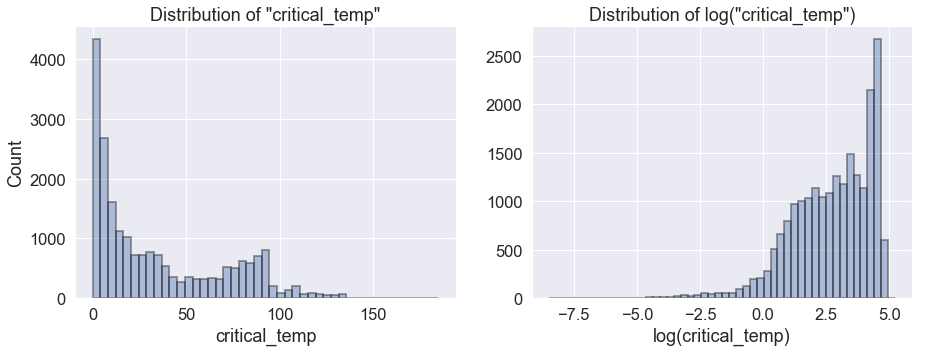

In [16]:
InteractiveShell.ast_node_interactivity = "last_expr"

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(all_data['critical_temp'], kde = False, hist_kws=dict(edgecolor="k", linewidth=2),ax=axes[0]);
sns.distplot(all_data['critical_temp'].apply(np.log), kde = False, hist_kws=dict(edgecolor="k", linewidth=2),ax=axes[1]);
axes[0].set_xlabel('critical_temp')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of "critical_temp"')
axes[1].set_xlabel('log(critical_temp)')
axes[1].set_title('Distribution of log("critical_temp")');

It looks like our dependent varaible is positivley skewed based on the left graph. Applying a log transformation to the data proves to be no help as it too exhibits a skew but, this time, in the negative direction. Let's create a Quantile-Quantile Plot (Q-Q Plot) to confirm whether or not our data is normally distributed.

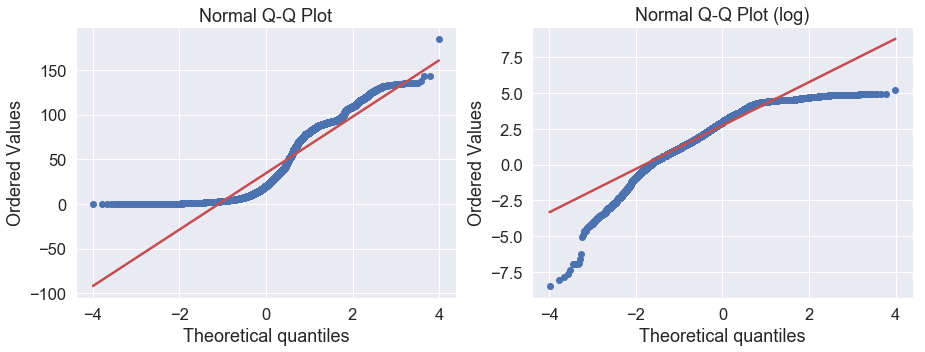

In [18]:
f, axes = plt.subplots(2, 2,figsize=(15,5))
measurements = all_data['critical_temp']
ax1 = plt.subplot(121)
stats.probplot(measurements, dist="norm", plot=pylab)
ax1.set_title('Normal Q-Q Plot')
ax1.set_alpha(1)
ax2 = plt.subplot(122)
stats.probplot(measurements.apply(np.log), dist="norm", plot=pylab)
ax2.set_title('Normal Q-Q Plot (log)');

The Q-Q Plot allows us to determine if two distributions are equivalent. In this case, we are comparing the distribution of 'critical_temp' with a theoretical, normal distribution (left). If 'critical_temp' were in fact normally distributed, then it would have followed the red line much more closely than it currently does. As we can see, the log transformation of 'critical_temp', on the right, isn't normal either.

The determination of whether or not our data is normally distributed is an important one as it will affect what model(s) we will use to fit our data on. Several models, such as linear regression, work on the assumption that the variable to be predicted is normally distributed. If we try to fit such a model absent of normality, we will be using an inappropriate model to approximate our data. By analogy, we'd be attempting to use a hammer as if it were a screwdriver; it might get the job done for the task at hand but it'll likley be done inefficiently and, quite possibly, incorrectly. 

Next, let's visualize the correlation between our varaibles.

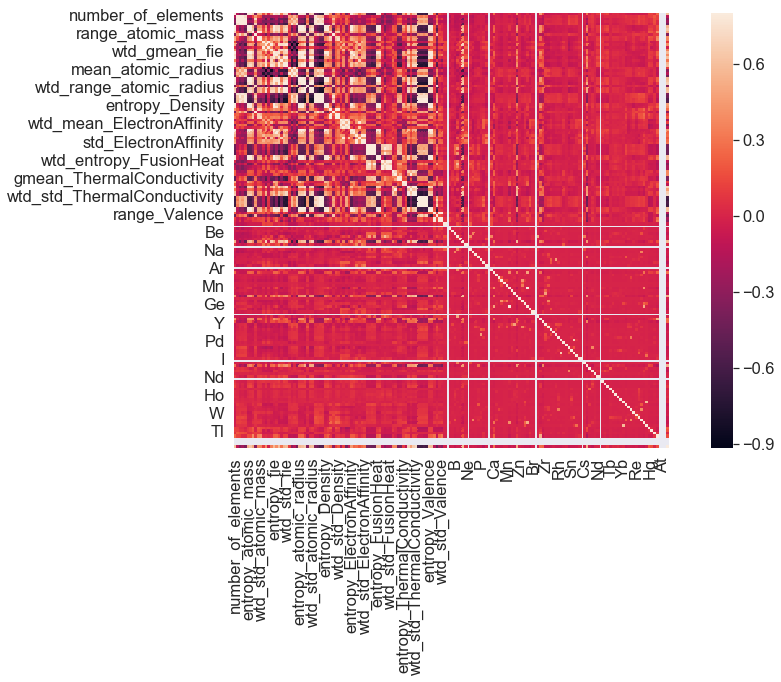

In [19]:
plt.figure(figsize=(15,8))
corrmat = all_data.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

Above, we have a heatmap of the correlation coefficients between all of the various features in our data. The correlation coefficient for each pair of features is represented as a color along a continuum. What we are looking for here are patches of very light and very dark colors which signify high correlations. High correlations may signal the presence of collinearity in the data which is troublsome because it may, both, introduce redundant information into the model and cause the model to calculate inaccurate parameters. 

We see that a majority of the data seems to possess acceptable correlation coefficients. These correlations, though, are mostly concentrated between pairs of features that include at least one of the elemental features derived from the breakdown of each compound's chemical formula. So, it seems like the elemental features are, most likely, clear of collinear relationships. Let's zoom into the top left corner of the graph and focus in on the features that were not derived, directly, from the chemical formulas. 

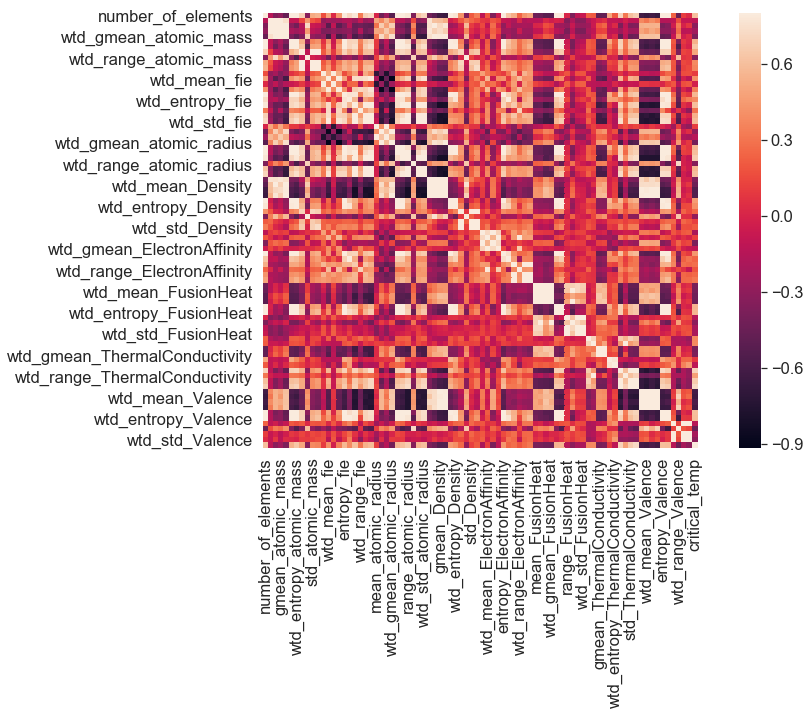

In [20]:
plt.figure(figsize=(15,8))
corrmat = feature_data.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

Here, we have a plot that is a little more colorful and, as a result, complex. Despite the range of colors that are present, we are only interested in pairs of features that produce, nearly, white or black patches. Although sparse, it is evident that there are some strongly linear relationships between the features. With the the previous two heatmaps, we know that problematic relationships between the features may exist, although far and few in between. Once we get into model selection, we may consider calculating Variance Inflation Factors (VIFs) to confirm any collinear relationships that may be hiding in the data.

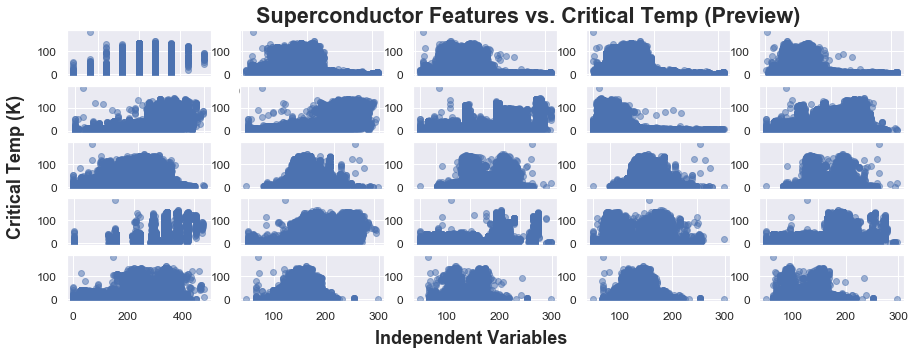

<Figure size 432x288 with 0 Axes>

In [23]:
# Preview of scatter plots between the dependent variable, 'critical temp', and the independent variables of 'feature_data'.

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,5))
fig.text(0.3, 0.9, 'Superconductor Features vs. Critical Temp (Preview)', fontsize='large', weight='bold')
fig.text(0.5, 0.01, 'Independent Variables', ha='center', fontsize='medium', weight='bold')
fig.text(0.07, 0.5, 'Critical Temp (K)', va='center', rotation='vertical', fontsize='medium', weight='bold')
for i, ax in enumerate(axes.flatten()):
    ax.scatter(feature_data.iloc[:,i], feature_data.iloc[:,81], alpha=0.5)
    ax.tick_params(axis='both',labelsize=12)

plt.show()
plt.tight_layout()

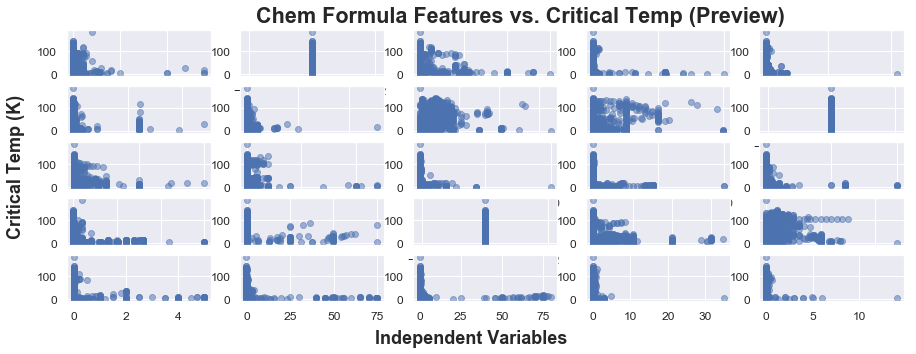

In [24]:
# Preview of scatter plots between the dependent variable, 'critical temp', and the independent variables of 'sc_chem_formula'.

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,5))
fig.text(0.3, 0.9, 'Chem Formula Features vs. Critical Temp (Preview)', fontsize='large', weight='bold')
fig.text(0.5, 0.01, 'Independent Variables', ha='center', fontsize='medium', weight='bold')
fig.text(0.07, 0.5, 'Critical Temp (K)', va='center', rotation='vertical', fontsize='medium', weight='bold')
for i, ax in enumerate(axes.flatten()):
    ax.scatter(sc_chem_formula.iloc[:,i], sc_chem_formula.iloc[:,86], alpha=0.5)
    ax.tick_params(axis='both',labelsize=12)

plt.show()

It seems like there are no obvious relationships between the features and 'critical_temp'. Because there are no obvious patterns to follow for the prediction of critical temperature, we are presented with a perfect machine learning problem. The hope is that we will build a model that can tease out subtle variations between the data points that humans can not see resulting in a way to predict critical temperature based on the data and information available to us. 

## Model Selection

Now, it is time to select the statistical learning technique we'd like to use to build our model. Since we know that it is a continuous, numerical variable we want to predict, we can narrow our options down to the various regression models out there. The best approach is to select a few models you believe will sufficient for the task at hand, obtain preliminary performance measurments for each using simple parameters and all of the avalilable features, and select the one with the highest accuracy. 

When faced with any machine learning problem, it is wise to first consider if the simplest model you can make will do. If a simple model fulfills your needs, you save yourself the time and resources that would be needed to create a complex model with comparable performance. In this case, the simplest model we could go with is a linear regression model. It is quick to train and easy to implement. Although, this model comes with several assumptions:

* Linear relationship between dependent and independent variables
* Normality of the dependent variable
* No or little multicollinearity
* No auto-correlation
* Homoscedasticity

Now, based on the analyses we have done so far, we have found faint linear relationships between the dependent and independent variables, a lack of normality in our Q-Q plots, and hints of multicollinearity amongst our independent varaibles. Not a very good start for the implementation of a linear regression model. Although, a linear regression model, whether appropriate or not, will serve as a great benchmark for the other models we choose. In addition, we'll be training a **Lasso Regression** which is a particular type of linear regression model that is able to correct for multicollinearity and lacks the assumption of normality required for regular linear regression. Still, assumptions of no auto-correlation and homoscedasticity are held.

Another key feature to consider when choosing a model is interpretability. How well of an understanding would we like to obtain, about the relationship between the dependent varaible and our features, from our model? Linear regression is arguably the most interpretable model we could choose but it is possible that less interpretable models will provide us with better predictions. For this reason, we will aso consider employing a **Random Forest Regression** model. Random Forest Regression doesn't require normality, can capture nonlinear relationships, are robust against multicollinearity, and have proven to be great models for the purposes of prediction. Oh, and let's not forget the built-in feature selection capabilities of both our chosen models as well.



## Predictive Model

Before putting the data through the models, lets remove any columns that possess all zero values. These are constant across all the observations and provide no additional predictivability. In addition, we produce a train-test plit of the data as well.

In [25]:
clean_data = all_data.loc[:, all_data.any()]

In [26]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(clean_data.iloc[:,:158], clean_data.iloc[:,158], test_size = 0.1, 
                                                    random_state = 2018)

Let's create a very simple performance benchmark to compare our models to. Suppose we took the average of all the critical temperatures and used that as the prediction for all inputs across the board. Lets calculate the metrics for such a prediction model and see how our initial models stack up. In this way, we'll at least get an idea of how well our models perform relative to predicting the average as the critical temperature for all superconductors.

In [27]:
avg_ct = np.full((1, len(y_train)), np.mean(y_train)).flatten() # array of mean sample set critical temperature

avg_scores_men = mean_absolute_error(avg_ct, y_train.as_matrix())
avg_scores_med = median_absolute_error(avg_ct, y_train.as_matrix())
print("Mean Absolute Error: ",avg_scores_men)
print("Median Absolute Error: ",avg_scores_med)

Mean Absolute Error:  29.438749369745334
Median Absolute Error:  29.155127339830706


Let's start off by creating our Lasso Regression model.

In [28]:
InteractiveShell.ast_node_interactivity = "all"

lsr_model = Lasso(random_state = 2018)
cv = StratifiedKFold(y_train, 5, random_state=2018) 
lsr_scores_men = cross_val_score(lsr_model, x_train, y_train, cv = cv, scoring = 'mean_absolute_error')
lsr_scores_med = cross_val_score(lsr_model, x_train, y_train, cv = cv, scoring = 'median_absolute_error')
print("Average Mean Absolute Error: ",-lsr_scores_men.mean())
print("Average Median Absolute Error: ",-lsr_scores_med.mean())

Average Mean Absolute Error:  13.601642345517366
Average Median Absolute Error:  10.452150173692058


Random Forest Regression model

In [202]:
rfr_model = RandomForestRegressor(random_state = 2018, oob_score=True)
cv = StratifiedKFold(y_train, 5, random_state=2018) 
rfr_scores_men = cross_val_score(rfr_model, x_train, y_train, cv = cv, scoring = 'mean_absolute_error')
rfr_scores_med = cross_val_score(rfr_model, x_train, y_train, cv = cv, scoring = 'median_absolute_error')
print("Average Mean Absolute Error: ",-rfr_scores_men.mean())
print("Average Median Absolute Error: ",-rfr_scores_med.mean())

Average Mean Absolute Error:  5.50626543145279
Average Median Absolute Error:  2.3416818370076364


It is clear that both the linear regression and random forest model perform better than simply using the mean critical temperature as our prediction. Although, it looks like our Random Forest is the clear winner with a mean/median absolute error (MAE) half that of the Linear Regression model. MAE was used here for two main reasons. First, our goal is to predict the critical temperature of a superconductor as closely as possible no matter the magnitude of the true temperature. We do not want to apply additional penalizations for higher errors, i.e. we want a difference of 10 degrees K to be twice as undesirable as a difference of 5 degrees kelvin. Additionally, we know that our dependent varaible is skewed which will often lead to the errors being skewed as well. Superconductors with relativley high critical values represent a minority of the population of superconductors, most of which possess low critical values. For this reason, it is possible that our model with harbor greater error rates for superconductors with higher true critical temperatures. These errors are not representative of the errors you will typically see and so, we do not want these errors to overshadow those of superconductors with lower natural critical temperatures. For this reason, both the mean and median absolute errors are included. More diligent analyses of the errors will be done after the model has been built.

Let's evaluate the performance of our basic random forest regression model, with default hyperparameters, on our test set. In this way, we'll create a benchmark to compare the performance of our final model against later in the analysis.

In [203]:
rfr_model.fit(x_train, y_train)
base_predictions = rfr_model.predict(x_test)

base_mean_ae = mean_absolute_error(y_test, base_predictions)
base_median_ae = median_absolute_error(y_test, base_predictions)
print("Test Mean Absolute Error: ",base_mean_ae)
print("Test Median Absolute Error: ",base_median_ae)

Test Mean Absolute Error:  5.181954079716824
Test Median Absolute Error:  2.027


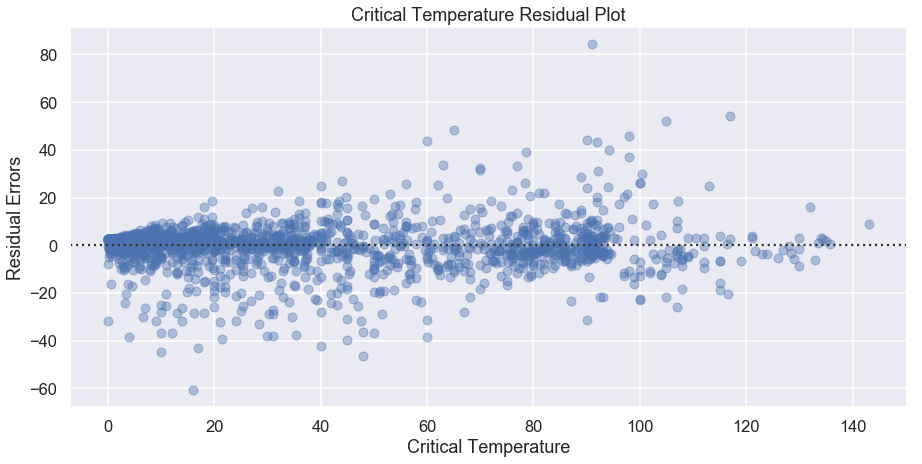

In [160]:
# Residuals plot

plt.figure(figsize=(15,7))
sns.set_context("talk")
residuals = (y_test - base_predictions)
ax = sns.residplot(y_test, residuals, lowess=False, scatter_kws={'alpha':0.4})
ax.set(xlabel='Critical Temperature', ylabel='Residual Errors', title='Critical Temperature Residual Plot');

The above graph is a residual plot which shows the distribution of the errors between our predicted values and true values. The graph exhibits no obvious pattern and is mostly uniform around the horizontal line where the residual error is equal to zero. Additionally, as one can tell by the differences in opacity between the points, most of the data points possess deviations from their true values that are, about, less than 10 degrees K. Although, one observation worth pointing out is that, for those points that do deviate considerably from their true values, some superconductors with lower critical temperatures are over estimated by the model while some superconductors with higher critical temperatures are under estimated. This is likely due to the skewed nature of our data towards lower critical temperatures. 

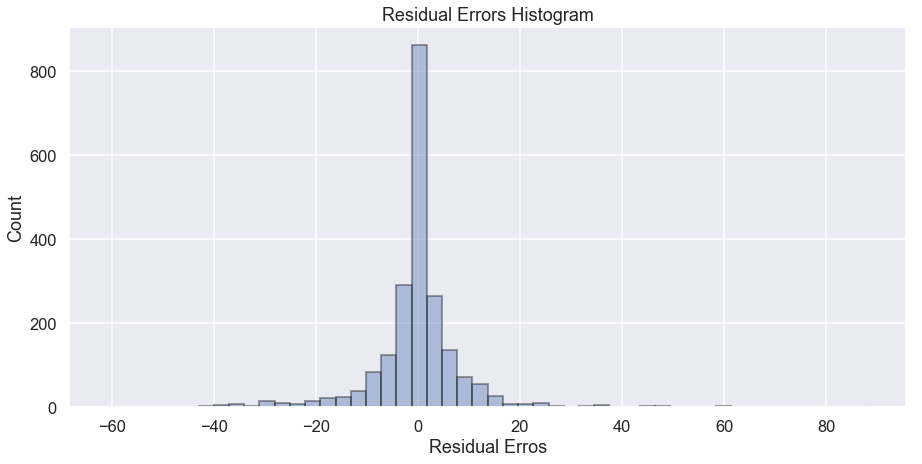

In [159]:
# Histogram residuals

plt.figure(figsize=(15,7))
sns.set_context("talk")
ax = sns.distplot(residuals, kde = False, hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(xlabel='Residual Erros', ylabel='Count', title='Residual Errors Histogram');

Here, we plot a histogram of our residuals which reveals a mostly normal distribution but obviously skewed as well as made evident by the fact that a vast majority of the predictions possess little to no deviation from their true values; residuals of zero.

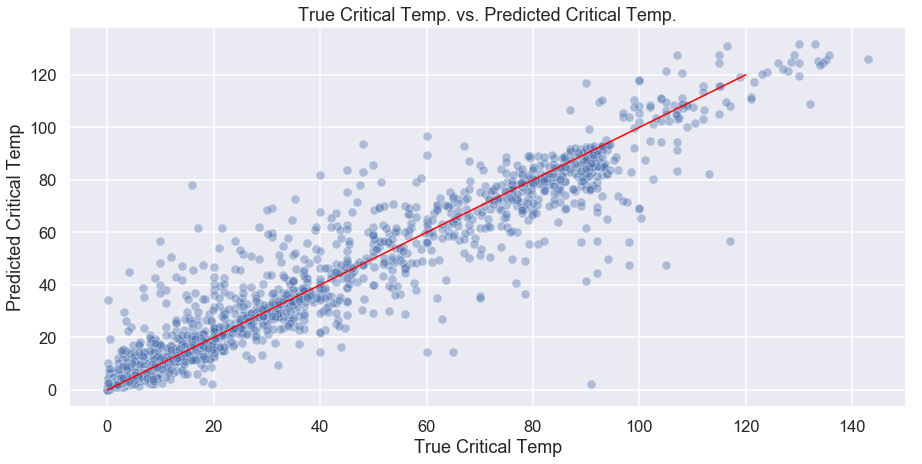

In [158]:
# Plot of true critical temperatures vs predicted critical temperatures

plt.figure(figsize=(15,7))
sns.set_context("talk")
ax = sns.scatterplot(x = y_test, y = base_predictions, alpha = 0.4)
ax.set(xlabel='True Critical Temp', ylabel='Predicted Critical Temp', title='True Critical Temp. vs. Predicted Critical Temp.')
plt.plot([0, 120], [0, 120], linewidth=1.5, color = 'red');

Finally, we have a plot of the predicted critical temperatures versus their corresponding true temperatures. The red diagnol line represents an ideal, perfect correlation between the predicted and true values. What we want to see is the data points to be packed as close to the line as possible. The points in our graph shows an obvious positive trend which is encouraging. Although, there is noticeable variance as one can see by the spread of the points outwards from the red line.

### Building the Model

Now that we have selected our model, let's consider how we can improve improve upon its initial iteration. Gathering more data and feature engineering usually have the greatest payoff in terms of time invested versus improved performance. Although, because we are unable to acquire additional data and the random forest model possesses built-in feature selection capabilities, we will try to improve our model by tuning various hyperparameters. Several of the random forest hyperparameters are already set to satisfactory defaults so, as a result, we will only focus on tuning the following parameters:

   * Number of decision trees in the forest.
   * Max number of features considered by each tree when splitting a node.
   * Max number of levels in each decision tree.
   * Min number of data points placed in a node before the node is split.
   * Min number of data points allowed in a leaf node.
    
Tuning these hyperparameters involves trial and error to figure out which combination will optimize the performance of our model. It would be tedious to do this all by hand; luckily, we have packages at our disposal which automate the hyperparameter search process while mitigating the possibility of overfitting by implementing cross validation.

To determine the ideal values for our hyperparameters, we will first visualize the relationship between the MAE of the model and each of the numerical hyperparameters. This will narrow the values over which we will run an exhaustive search using cross validation which will automatically select the best values for us.

In [36]:
# Determining the ideal hyperparameter values.

# RFR with fixed hyperparameters max_depth, max_features and min_samples_leaf
rfr_test = RandomForestRegressor(max_depth = 10, n_estimators = 10, min_samples_split = 10, min_samples_leaf = 1, 
                                 random_state = 2018) 

# Range of `n_estimators` values to explore.
n_estim = filter(lambda x: x % 10 == 0, list(range(10,101)))

# Range of `max_depth` values to explore.
max_dep = filter(lambda x: x % 10 == 0, list(range(10,101)))

# Range of `min_samples_split` values to explore.
min_samp_split = filter(lambda x: x % 10 == 0, list(range(10,101)))

# Range of `min_samples_leaf` values to explore.
min_samp_leaf = filter(lambda x: x % 2 == 0, list(range(2,21)))
 
def get_cvscores(model, x_train_data, y_train_data, param, param_name):
    
    cv_scores = []
    cv = StratifiedKFold(y_train_data, 5, random_state=2018) 

    for i in param:
        if param_name == 'n_estim':
            model.set_params(n_estimators=i)
        elif param_name == 'max_dep':
            model.set_params(max_depth=i)
        elif param_name == 'min_samp_split':
            model.set_params(min_samples_split=i)
        elif param_name == 'min_samp_leaf':
            model.set_params(min_samples_leaf=i)
        scores = cross_val_score(model, x_train_data, y_train_data, cv=cv, scoring='mean_absolute_error', n_jobs = -1)
        cv_scores.append((-scores).mean())
        
    return(cv_scores)

In [37]:
%%time
n_estim_cvscores = get_cvscores(rfr_test, x_train, y_train, n_estim, 'n_estim')

CPU times: user 4.82 s, sys: 1.14 s, total: 5.96 s
Wall time: 14min 19s


In [38]:
%%time
max_dep_cvscores = get_cvscores(rfr_test, x_train, y_train, max_dep, 'max_dep')

CPU times: user 5.98 s, sys: 1.41 s, total: 7.39 s
Wall time: 40min 46s


In [39]:
%%time
min_samp_split_cvscores = get_cvscores(rfr_test, x_train, y_train, min_samp_split, 'min_samp_split')

CPU times: user 5.5 s, sys: 1.34 s, total: 6.84 s
Wall time: 33min 53s


In [40]:
%%time
min_samp_leaf_cvscores = get_cvscores(rfr_test, x_train, y_train, min_samp_leaf, 'min_samp_leaf')

CPU times: user 5.49 s, sys: 1.35 s, total: 6.84 s
Wall time: 29min 38s


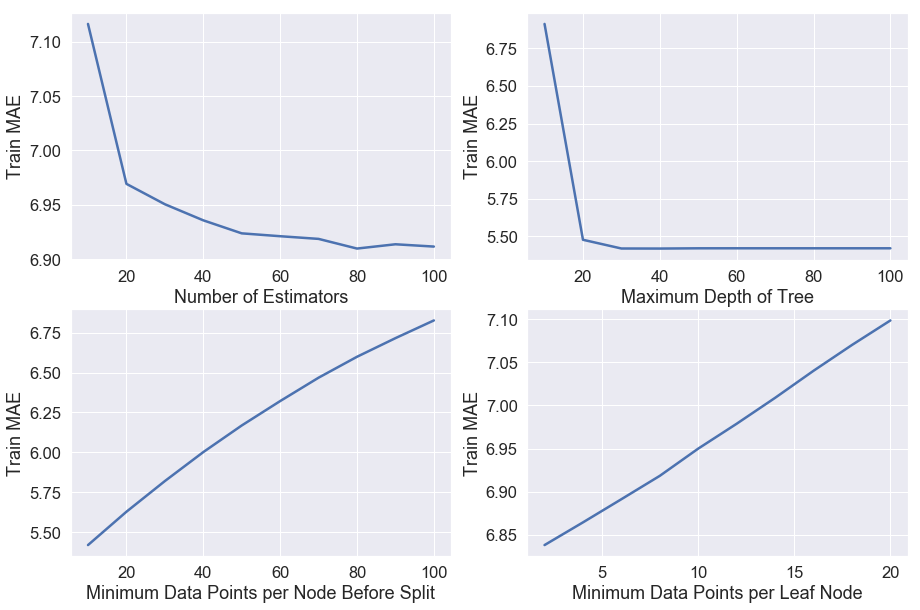

In [42]:
# Plotting the relationship between hyperparameter value and MAE

f, axes = plt.subplots(2, 2,figsize=(15,10))

axes[0][0].plot(range(10,101,10), n_estim_cvscores)
axes[0][1].plot(range(10,101,10), max_dep_cvscores)
axes[1][0].plot(range(10,101,10), min_samp_split_cvscores)
axes[1][1].plot(range(2,21,2), min_samp_leaf_cvscores)

axes[0][0].set_xlabel('Number of Estimators')
axes[0][0].set_ylabel('Train MAE')
axes[0][1].set_xlabel('Maximum Depth of Tree')
axes[0][1].set_ylabel('Train MAE')
axes[1][0].set_xlabel('Minimum Data Points per Node Before Split')
axes[1][0].set_ylabel('Train MAE')
axes[1][1].set_xlabel('Minimum Data Points per Leaf Node')
axes[1][1].set_ylabel('Train MAE')
plt.show();

In [46]:
# Finding the x values corresponding to the lowest Train MAE
p1_min_x = range(10,101,10)[n_estim_cvscores.index(min(n_estim_cvscores))]
p2_min_x = range(10,101,10)[max_dep_cvscores.index(min(max_dep_cvscores))]
p3_min_x = range(10,101,10)[min_samp_split_cvscores.index(min(min_samp_split_cvscores))]
p4_min_x = range(2,21,2)[min_samp_leaf_cvscores.index(min(min_samp_leaf_cvscores))]

print(p1_min_x) 
print(p2_min_x) 
print(p3_min_x) 
print(p4_min_x) 

80
40
10
2


In [47]:
# Determining optimal hyperparameters using Exhaustive Grid Search

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,40,50],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [2],
    'min_samples_split': [10],
    'n_estimators': [80,100]
}
# Create a based model
rfr_test_2 = RandomForestRegressor(random_state = 2018)

# Instantiate the grid search model
cv = StratifiedKFold(y_train, 5, random_state=2018) 
grid_search = GridSearchCV(estimator = rfr_test_2, param_grid = param_grid, cv = cv, n_jobs = -1, verbose = 2)

In [50]:
%%capture

#Fit the grid search to data
grid_search.fit(x_train, y_train);

In [51]:
# Print best hyperparameter values
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=2018, verbose=0, warm_start=False)

### Assessing the Model 

Now that we have the ideal hyperparameters for our model, let's create and evaluate the final model.

In [52]:
rfr_final = RandomForestRegressor(max_depth = 50, n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, 
                                  bootstrap = True , max_features = 'auto', oob_score = True, random_state = 2018) 

In [53]:
# Final model evaluation metrics

rfr_final.fit(x_train, y_train)
cv = StratifiedKFold(y_train, 5, random_state=2018) 
rfr_train_scores_men = cross_val_score(rfr_final, x_train, y_train, cv = cv, scoring = 'mean_absolute_error')
rfr_train_scores_med = cross_val_score(rfr_final, x_train, y_train, cv = cv, scoring = 'median_absolute_error')
print("Average Train Mean Absolute Error: ",-rfr_train_scores_men.mean())
print("Average Train Median Absolute Error: ",-rfr_train_scores_med.mean())

predictions = rfr_final.predict(x_test)

mean_ae = mean_absolute_error(y_test, predictions)
median_ae = median_absolute_error(y_test, predictions)
print("Test Mean Absolute Error: ",mean_ae)
print("Test Median Absolute Error: ",median_ae)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=2018, verbose=0, warm_start=False)

Average Train Mean Absolute Error:  5.4397256272658385
Average Train Median Absolute Error:  2.425227335154304
Test Mean Absolute Error:  5.117221645371016
Test Median Absolute Error:  2.2051403938381817


The table below compares model absolute errors (AE) between the base and final random forest regression models: 

| RFR Model | Avg. Train Mean AE  | Avg. Train Median AE  | Test Mean AE  | Test Median AE  |
|-----------|---------------------|-----------------------|---------------|-----------------|
|   Base    |       5.506         |         2.342         |     5.182     |      2.027      |
|   Final   |       5.440         |         2.425         |     5.117     |      2.205      |
|% AE Change|       -1.2%         |         +3.5%         |     -1.3%     |      +8.8%      |

Based on the metrics of our final model, it seems as if, unfortunately, the optimization of the model hyperparameters only show marginal changes in the performance of our model. The model was able to fit the data slighlty better with the optimized hyperparameters than without. In addition, a slight decrease in the mean absolute error was observed for the test set while the median absolute error increased. This seems as if the model is doing a slightly better job at predicting the critical temperatures for superconductors with higher natural critical temperatures but at the expense of being able to predict superconductors with lower ciritical temperatures less accurately.   

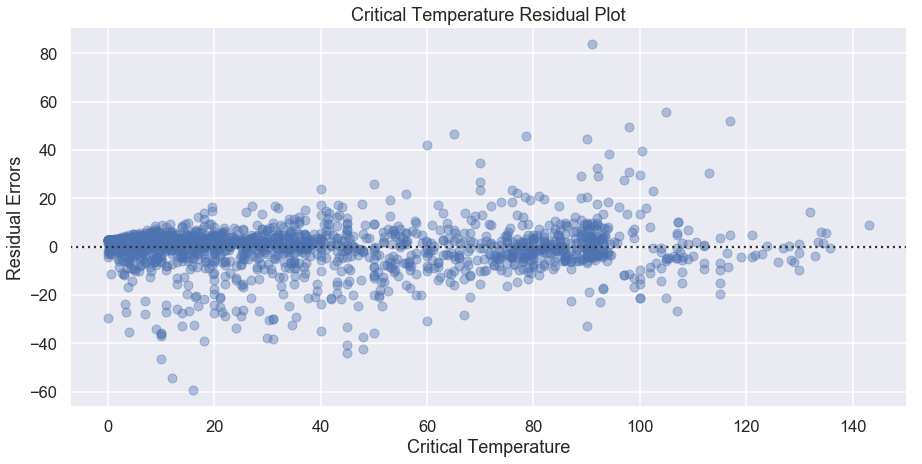

In [155]:
# Residuals plot

InteractiveShell.ast_node_interactivity = "last_expr"

plt.figure(figsize=(15,7))
sns.set_context("talk")
residuals = (y_test - predictions)
ax = sns.residplot(y_test, residuals, lowess=False, scatter_kws={'alpha':0.4})
ax.set(xlabel='Critical Temperature', ylabel='Residual Errors', title='Critical Temperature Residual Plot');

This residual plot shows something similar to our base random forest where the model seems to be over estimating the critical temperature for superconductors with lower true critical temperatures but under estimating some of those superconductors with higher crtitical temperatures. All-in-all, the plot is unremarkable exhibiting a fairly uniform distribution of residuals.

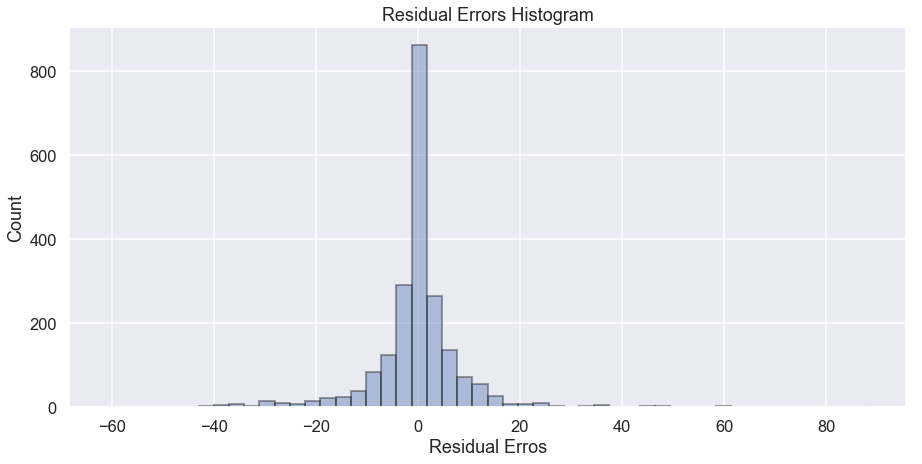

In [156]:
# Residuals histogram

plt.figure(figsize=(15,7))
sns.set_context("talk")
ax = sns.distplot(residuals, kde = False, hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(xlabel='Residual Erros', ylabel='Count', title='Residual Errors Histogram');

The residual errors of our model seem to be mostly normally distributed with a high majority possessing very little to no deviation from zero. 

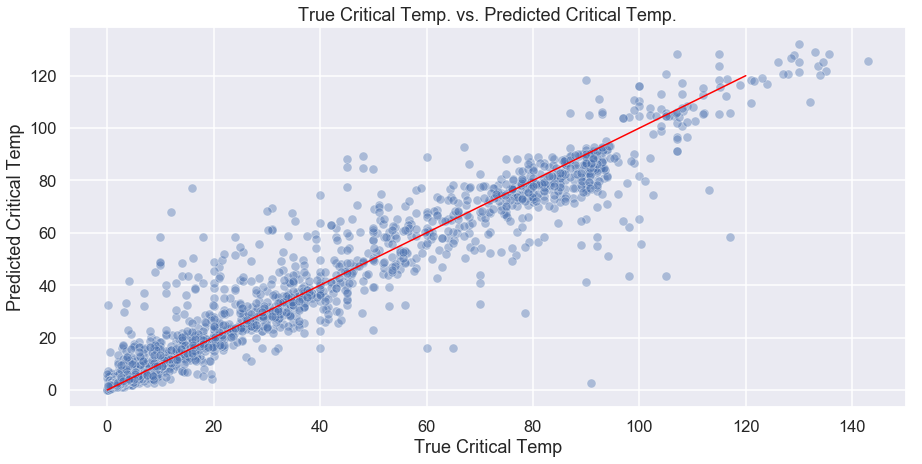

In [157]:
# Plot of true critical temperatures vs predicted critical temperatures

plt.figure(figsize=(15,7))
sns.set_context("talk")
ax = sns.scatterplot(x = y_test, y = predictions, alpha = 0.4)
ax.set(xlabel='True Critical Temp', ylabel='Predicted Critical Temp', title='True Critical Temp. vs. Predicted Critical Temp.')
plt.plot([0, 120], [0, 120], linewidth=1.5, color = 'red');

Here, our data exhibits a clear positive correlation which shows a promising relation between our predictions and the true values. Additionally, the points on this graph exhibit less spread than the one produced by our base random forest. Although, noticable variation is present as one may observe by the spread of the data away from the red line. 

Whenever we create a predictive model that we would like to set loose on the problems of the real world, we often require prediction intervals to accompany our predictions to guage the certainty of our models and the confidence that our predictions are accurate. Prediction and confidence intervals for linear regression models are well known and widely used, but random forests are largely confined to single point estimates due to an inadequate understanding of their underlying statistical properties. This fact greatly limits the utility of random forests; luckily, researchers have developed ways of getting around the complexity of random forests to obtain variability measures of their predictions. 

The technique we'll use here exploits the fact that random forests, by default, consider only a random sample of the data, selected via the bootstrap method, when training any individual decision tree in the forest. This means that some data points from the training sample can be reused as a testing set when passed into those trees in which they were not used to help train the tree. We then obtain an average of the errors between these predictions and their true values resulting in a Mean Squared Prediction Error (MSPE) which is then square-rooted and multipled by 2 to obtian an error metric that can be used to create a 95% prediction interval. 

This technique was developed by Benjamin Lu and Dr. Jo Hardin of Pomona College. Their paper outlining the technique in further detail can be found [here](http://pages.pomona.edu/~jsh04747/Student%20Theses/BenjiLu17.pdf).

Let's calculate a 95% confidence interval and plot our data along with our prediction intevals.

In [200]:
# Calculating our 95% prediction intervals and the percentage of our true critical temperatures that fall within them.

mspe = mspe_one(x_train, y_train, rfr_final) 
pred_int = 2*sqrt(mspe)   

lower_bound = predictions - pred_int
upper_bound = predictions + pred_int

y_test_arr = y_test.as_matrix()
in_pred_int = 0

for i in range(0,len(predictions)):
    if lower_bound[i] < y_test_arr[i] and upper_bound[i] > y_test_arr[i]:
        in_pred_int += 1
    else:
        pass

pred_int_rate = (in_pred_int/len(predictions))*100

print('Width of prediction interval: ', "{0:.2f}".format(pred_int*2))
print('Percent of true values within prediciton interval: ', "{0:.2f}".format(pred_int_rate),'%')

Width of prediction interval:  37.19
Percent of true values within prediciton interval:  94.41 %


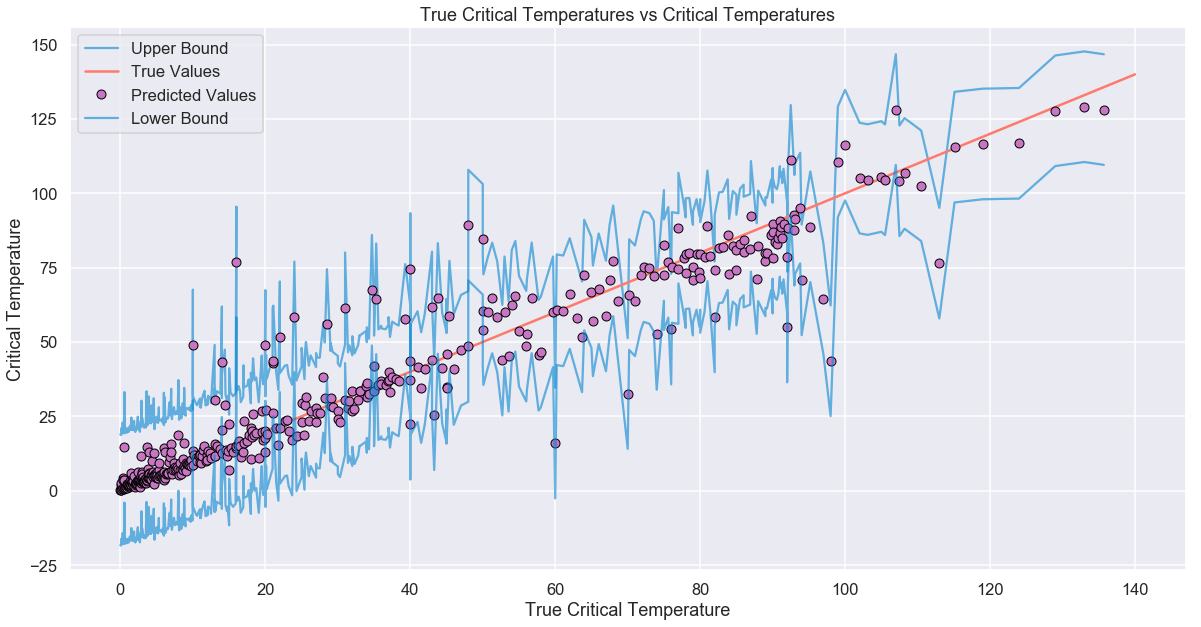

In [198]:
# Prediction interval plot

pred_in_df = pd.DataFrame({'upper':upper_bound, 'lower':lower_bound, 'predictions':predictions, 'true':y_test_arr})
pred_in_df = pred_in_df.sort_values(['true'], ascending=[True])
pred_in_df['index'] = list(range(1,2128))

plt.figure(figsize=(20,10))
plt.plot(pred_in_df.loc[::5,'true'], pred_in_df.loc[::5,'upper'], color = 'xkcd:cerulean', label = 'Upper Bound', alpha=0.6)
plt.plot([0, 140], [0, 140], linewidth=2.5, color = 'xkcd:salmon', label='True Values')
plt.plot(pred_in_df.loc[::5,'true'], pred_in_df.loc[::5,'predictions'], 'go', label = 'Predicted Values', color = 'xkcd:orchid', markeredgecolor= "black")
plt.plot(pred_in_df.loc[::5,'true'], pred_in_df.loc[::5,'lower'], color = 'xkcd:cerulean', label = 'Lower Bound', alpha=0.6)
plt.xlabel('True Critical Temperature')
plt.ylabel('Critical Temperature')
plt.title('True Critical Temperatures vs Critical Temperatures')
plt.legend(loc='upper left');

Based on our calculations, our derived prediction interval captures ~94% of the true values, very close to 95% which is what we expect for a 95% prediction interval. Above, we have plotted a red, diagnol line representing the true values of critical temperature along with the prediction intervals/bounds in blue and the predicted value, corresponding to each true value, in purple. Here, only every 5th data pont was plotted for easier interpretation. With this plot, we may easily visualize the width of the prediction intervals which was calculated to be ~37 degrees kelvin. In other words, we can say that for 95% of the predictions we make, the true value will be within ~19 degrees of our predicted value. I wonder what our prediction interval would be for our base random forest model...

In [204]:
mspe_base = mspe_one(x_train, y_train, rfr_model) 
pred_int_base = 2*sqrt(mspe)

print('True values are within: ', "{0:.2f}".format(pred_int_base), ' degrees K of our predictions')
print('Width of prediction interval: ', "{0:.2f}".format(pred_int_base*2))

True values are within:  18.60  degrees K of our predictions
Width of prediction interval:  37.19


Looks like the base model with default hyperparameters constructs the same prediction intervals as our optimized model.

Finally, let's take a look at what our model has judged to be the most important features for the prediction of superconductor critical temperature.

In [212]:
# Determining importance of features

feature_list = list(x_train.columns)

# Get numerical feature importances
importances = list(rfr_final.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:28} Importance: {}'.format(*pair)) for pair in feature_importances[0:20]];

Variable: Cu                           Importance: 0.62
Variable: Ca                           Importance: 0.05
Variable: Ba                           Importance: 0.04
Variable: wtd_gmean_Density            Importance: 0.02
Variable: gmean_Valence                Importance: 0.02
Variable: wtd_range_atomic_mass        Importance: 0.01
Variable: range_atomic_radius          Importance: 0.01
Variable: wtd_std_atomic_radius        Importance: 0.01
Variable: gmean_Density                Importance: 0.01
Variable: entropy_Density              Importance: 0.01
Variable: wtd_std_ElectronAffinity     Importance: 0.01
Variable: wtd_mean_ThermalConductivity Importance: 0.01
Variable: range_ThermalConductivity    Importance: 0.01
Variable: wtd_mean_Valence             Importance: 0.01
Variable: wtd_gmean_Valence            Importance: 0.01
Variable: wtd_std_Valence              Importance: 0.01
Variable: O                            Importance: 0.01
Variable: Fe                           Importanc

Above is a list of the features that our final model deemed most important in the prediction of critical temperature. Without a doubt, it seems like the number of copper (Cu) atoms in a superconductor's chemical make-up is the most significant predictor of critical temperature. We should consider whether this claim has any logical basis using domain knowledge. Copper is a great conductor of electricity and is a very common component in wires and electronics as a result. It may be possible that the copper atoms endow compounds with some sort of properties that affect conductivity as the temperature decreases. Whatever this property may be, it's clear that it is not present in our set of training features; otherwise, it would be the most significant feature in our data set. Although, we must be cautious when extrapolating such an inference due to the way in which random forests obtain their predictions. 

Under the hood, the random forest is partitioning the data points based on the groupings that result in the lowest sum of squared errors for the whole data set. So, just because a forest concludes that a certain feature produces the clearest division between the data points, does not automatically mean that that feature possesses the most telling relationship with the dependent varaible. In other words, we can not say how, or even whether or not, critical temperature is affected by the number of copper atoms in a compound. Case-in-point, below are the plots of copper atoms versus critical temp. and a histogram of the nuber of coper atoms in each compound. There is no relationship between the number of copper atoms and critical temperature at all. Furthermore, it looks like 50% of all of our data points possess no copper atoms at all. This would provide the greatest partition of our data between those compounds with and without copper atoms. This is all not to discredit copper atoms, it is simply to illustrate the difficulty of interpreting random forests. All of the features deemed important by the model should be carefully considered for the roles they may play in the determination of critical temperature irrespective of the magnitude of the 'importance'. 

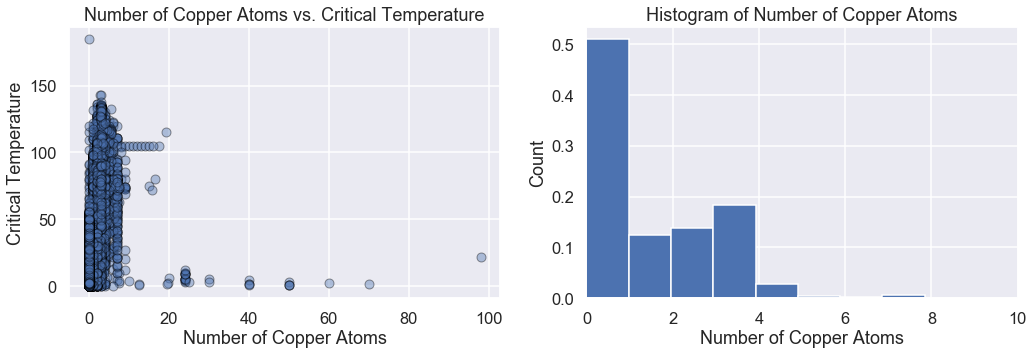

In [272]:
f, axes = plt.subplots(1, 2,figsize=(17,5))

axes[0].plot(all_data['Cu'], all_data['critical_temp'], 'o', alpha=0.4, markeredgecolor='black')
axes[0].set_xlabel('Number of Copper Atoms')
axes[0].set_ylabel('Critical Temperature')
axes[0].set_title('Number of Copper Atoms vs. Critical Temperature')

weights = np.ones_like(all_data['Cu'])/float(len(all_data['Cu']))
axes[1].hist(all_data['Cu'], bins=100, weights=weights, normed=False)
axes[1].set_xlim(0,10)
axes[1].set_xlabel('Number of Copper Atoms')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of Number of Copper Atoms')
plt.show()

Despite their lack of interpretability, it is undeniable that the 'important' features have the greatest affect on the predictivability of the model. Let's see if training a model on just these features provides any increase in the accuracy of our predictions.

In [275]:
imp_feat = ['Cu', 'Ca', 'Ba', 'wtd_gmean_Density', 'gmean_Valence', 'wtd_range_atomic_mass', 'range_atomic_radius',
            'wtd_std_atomic_radius', 'gmean_Density', 'entropy_Density', 'wtd_std_ElectronAffinity', 
            'wtd_mean_ThermalConductivity', 'range_ThermalConductivity', 'wtd_mean_Valence', 'wtd_gmean_Valence',
            'wtd_std_Valence', 'O', 'Fe', 'Zn', 'Pr']

imp_feat_xtrian = x_train[imp_feat]
imp_feat_xtest = x_test[imp_feat]

rfr_best_feat = RandomForestRegressor(random_state=2018)
rfr_best_feat.fit(imp_feat_xtrian, y_train)
cv = StratifiedKFold(y_train, 5, random_state=2018) 
rfr_train_scores_men = cross_val_score(rfr_best_feat, imp_feat_xtrian, y_train, cv = cv, scoring = 'mean_absolute_error')
rfr_train_scores_med = cross_val_score(rfr_best_feat, imp_feat_xtrian, y_train, cv = cv, scoring = 'median_absolute_error')
print("Average Train Mean Absolute Error: ",-rfr_train_scores_men.mean())
print("Average Train Median Absolute Error: ",-rfr_train_scores_med.mean())

predictions_imp_feat = rfr_best_feat.predict(imp_feat_xtest)

mean_ae = mean_absolute_error(y_test, predictions_imp_feat)
median_ae = median_absolute_error(y_test, predictions_imp_feat)
print("Test Mean Absolute Error: ",mean_ae)
print("Test Median Absolute Error: ",median_ae)

Average Train Mean Absolute Error:  5.610204600109767
Average Train Median Absolute Error:  2.3778692171161167
Test Mean Absolute Error:  5.423693228596214
Test Median Absolute Error:  2.3365476190476215


Looks like a model with just the 'important' features alone does no better, slightly worse in fact, than our final model with all of the features included.

## Conclusion

Our goal for this project was to develop a statistical model to predict the critical temperature of a compound based on characteristics of its chemical nature. We decided to use a Random Forest Regression (RFR) model after determining that a Linear Regression model would not do. We continued to build off of our initial RFR by tuning the hyperparameters of the model which proved futile. Our model did no matter with the optimized parameters than it did with the default parameters; they exhibited similar performances. As a result, I would continue to work on the base model with default parameters to save time and resources when building successive iterations of this model. In addition, the fact that optimization had little to no effect on the performance of our model signals that the only way to improve the model moving forward would be to gather additional data points and expand the feature space. Nevertheless, our final model was able to predict the true critical temperature for superconductors within 19 degrees K with a 95% accuracy and a majority of the predictions made by the model were ~2-5 degrees K away from the true value. 